# Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

◾ As a security/defense analyst, try to find out the hot zone of terrorism.

◾ What all security issues and insights you can derive by EDA?

In [1]:
#importing useful libraries
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
terr_df = pd.read_csv('E:\Datasets\global-terrorism-dataset.csv',  encoding ='ISO-8859-1', low_memory=False)


In [3]:
terr_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


# Understanding the Data

In [4]:
terr_df.shape

(181691, 135)

In [5]:
terr_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
terr_df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [7]:
terr_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
terr_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                          'region_txt':'Region','attacktype1_txt':'Attack_Type','target1':'Target','nkill':'Killed',
                          'nwound':'Wounded','gname':'Group','targtype1_txt':'Target_Type',
                          'weaptype1_txt':'Weapon_type','latitude':'Latitude',
                          'longitude':'Longitude','target1':'Target','city':'City'},inplace=True)

In [9]:
# percentage of missing values in our dataset

missing_values = (((terr_df.isnull().sum()).sum())/terr_df.size)*100
missing_values

56.481718962414206

More than 50% values are Null, we need to clean the Dataset first

In [10]:
# creating dataframe with necessary columns only

terr_df = terr_df[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude','Attack_Type','Killed',
              'Wounded','Group','Target','Target_Type','Weapon_type']]
terr_df.head(10)

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack_Type,Killed,Wounded,Group,Target,Target_Type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Black Nationalists,Cairo Police Headquarters,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Police,Firearms
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Unknown,Edes Substation,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary


In [11]:
for i in terr_df.columns:
    print(i,terr_df[i].nunique())

Year 47
Month 13
Day 32
Country 205
State 2855
Region 12
City 36674
Latitude 48322
Longitude 48039
Attack_Type 9
Killed 205
Wounded 238
Group 3537
Target 86006
Target_Type 22
Weapon_type 12


In [12]:
terr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Attack_Type  181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Group        181691 non-null  object 
 13  Target       181055 non-null  object 
 14  Target_Type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


As we can see, 'Wounded' and 'Killed' Attributes have lots of Null values, need to fill null values

In [13]:
terr_df['Wounded'] = terr_df['Wounded'].fillna(0).astype(int)
terr_df['Killed'] = terr_df['Killed'].fillna(0).astype(int)

In [14]:
terr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Attack_Type  181691 non-null  object 
 10  Killed       181691 non-null  int32  
 11  Wounded      181691 non-null  int32  
 12  Group        181691 non-null  object 
 13  Target       181055 non-null  object 
 14  Target_Type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
dtypes: float64(2), int32(2), int64(3), object(9)
memory usage: 20.8+ MB


###### Cleaned Data

In [15]:
terr_df.head(10)

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack_Type,Killed,Wounded,Group,Target,Target_Type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0,0,Black Nationalists,Cairo Police Headquarters,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0,0,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Police,Firearms
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0,0,Unknown,Edes Substation,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0,0,New Year's Gang,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0,0,New Year's Gang,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary


# Univariate Analysis

In [16]:
terr_df['Attack_Type'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_Type, dtype: int64

In [17]:
(terr_df['Attack_Type'].value_counts()/terr_df.shape[0])*100

Bombing/Explosion                      48.574228
Armed Assault                          23.484377
Assassination                          10.629035
Hostage Taking (Kidnapping)             6.141196
Facility/Infrastructure Attack          5.699787
Unknown                                 4.004601
Unarmed Assault                         0.558641
Hostage Taking (Barricade Incident)     0.545432
Hijacking                               0.362704
Name: Attack_Type, dtype: float64

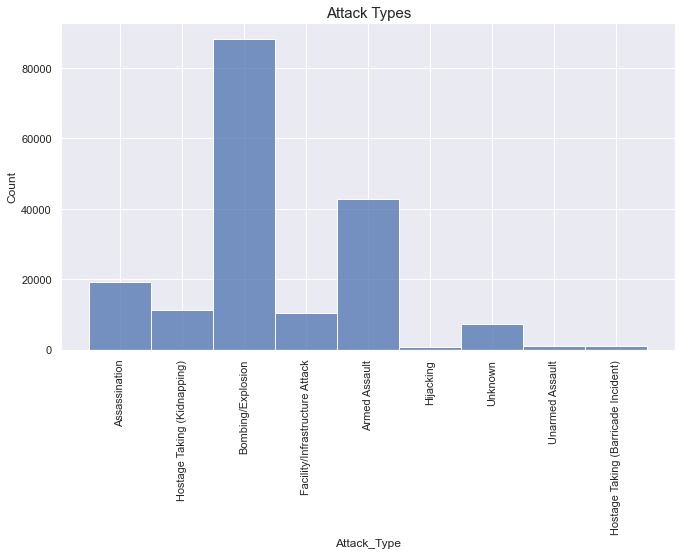

In [18]:
# 10 most attacked targets

plt.figure(figsize = (11,6))
sns.histplot(terr_df['Attack_Type'], palette='cubehelix')
plt.title('Attack Types',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Conclusion : 
◾ 50% of the Attack happened with Bombing/Explosion.

◾ 10-20% of the Attack happened with Armed Assault and Assassination rest are in between 0-6%

# Terrorist Targets: The Ten Countries Which Suffer Most From Terrorism

In [19]:
terr_df.Country.value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

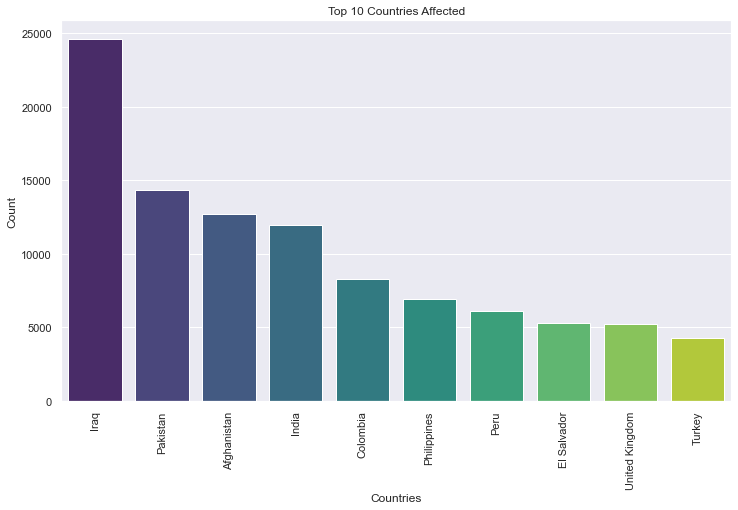

In [20]:
plt.figure(figsize=(12,7))
sns.barplot(terr_df['Country'].value_counts()[:10].index,terr_df['Country'].value_counts()[:10].values,palette='viridis')
plt.title('Top 10 Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

According to research, Iraq is the most affected country by terrorism, then comes Pakistan and Afganistan.

In [21]:
(terr_df['Target_Type'].value_counts().head(10)/terr_df['Target_Type'].shape[0])*100

Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Name: Target_Type, dtype: float64

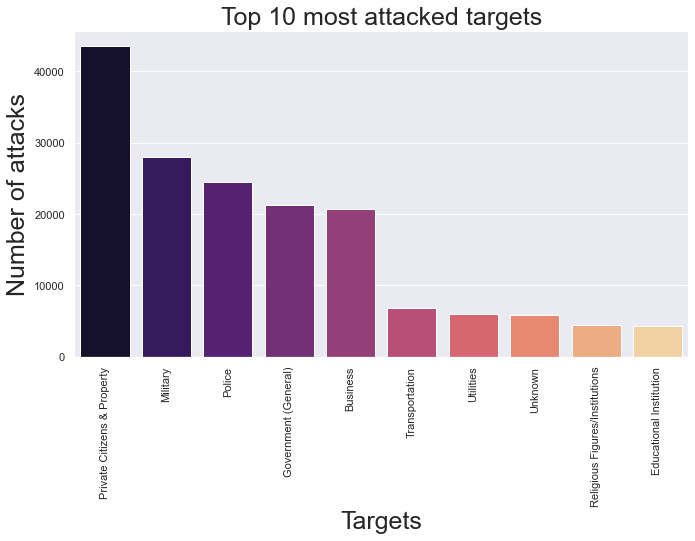

In [22]:
# 10 most attacked targets

plt.figure(figsize = (11,6))
sns.barplot(terr_df['Target_Type'].value_counts().head(10).index, terr_df['Target_Type'].value_counts().head(10).values, 
            palette='magma')
plt.title('Top 10 most attacked targets',fontsize=25)
plt.xlabel('Targets',fontsize=25)
plt.ylabel('Number of attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

### This Graph demonstrates:

◾ The most Attacked Target is 'Private Citizens & Property' which is approximately 25%

◾ 10-20% is the Target which is 'Military','Police', 'Government', 'Business'

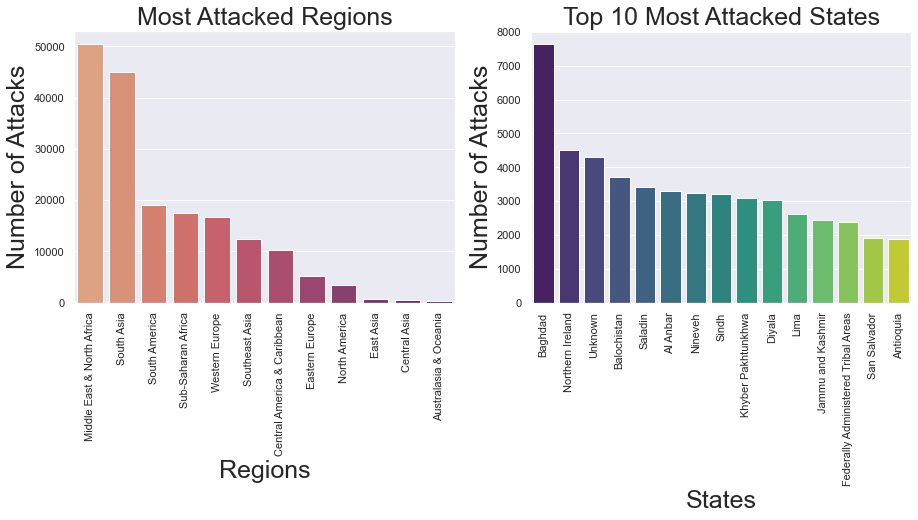

In [23]:
plt.subplot(1,2,1)
# regions with most attacks 
sns.barplot(terr_df['Region'].value_counts().index, terr_df['Region'].value_counts().values,palette='flare')
plt.title('Most Attacked Regions',fontsize=25)
plt.xlabel('Regions',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(terr_df['State'].value_counts().head(15).index, terr_df['State'].value_counts().head(15).values,palette='viridis')
plt.title('Top 10 Most Attacked States',fontsize=25)
plt.xlabel('States',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

### With these Graphs, we can conclude that :

◾ Most Attacked Region is 'Middle East and North Africa' then comes South Asia.

◾ Most Attacked States is 'Baghdad'.

In [24]:
(terr_df['Weapon_type'].value_counts().head()/terr_df['Weapon_type'].shape[0])*100

Explosives    50.869883
Firearms      32.210731
Unknown        8.342185
Incendiary     6.128537
Melee          2.011657
Name: Weapon_type, dtype: float64

Text(0, 0.5, 'Number of Weapon Used')

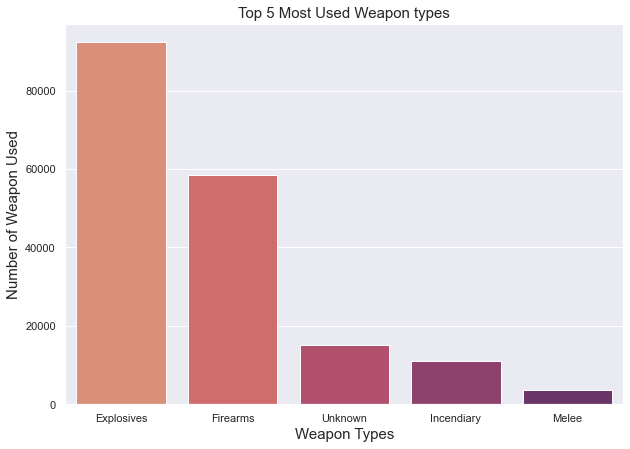

In [25]:
# Top 5 most used weapons types in terror attacks

plt.figure(figsize=(10,7))
sns.barplot(terr_df['Weapon_type'].value_counts().head().index, terr_df['Weapon_type'].value_counts().head().values,palette='flare')
plt.title('Top 5 Most Used Weapon types',fontsize=15)
plt.xlabel('Weapon Types',fontsize=15)
plt.ylabel('Number of Weapon Used',fontsize=15)

Almost 50% of Weapon used is 'Explosives' whereas 32% 'Firearms' used in the terrorism.

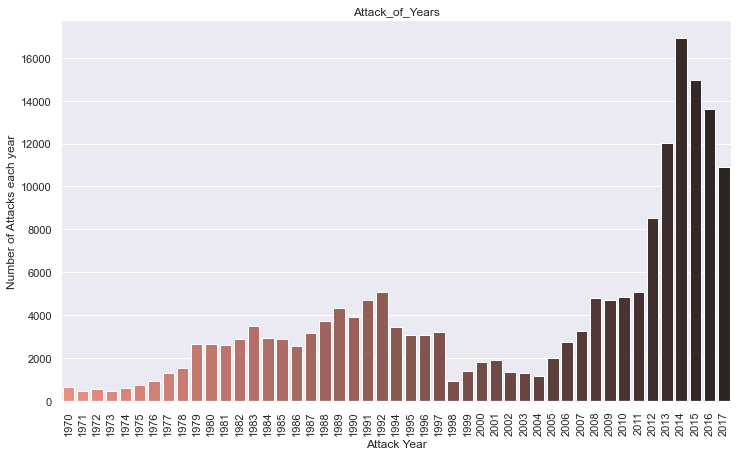

In [26]:
x_year = terr_df['Year'].unique()
y_count_years = terr_df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (12,7))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'dark:salmon_r')
plt.xticks(rotation = 90)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

### This graphs shows

◾ 2014 appears to be witness of a huge terrorist attacks.

◾ 2014 onwards recorded a large increase in attacks of terrorism.

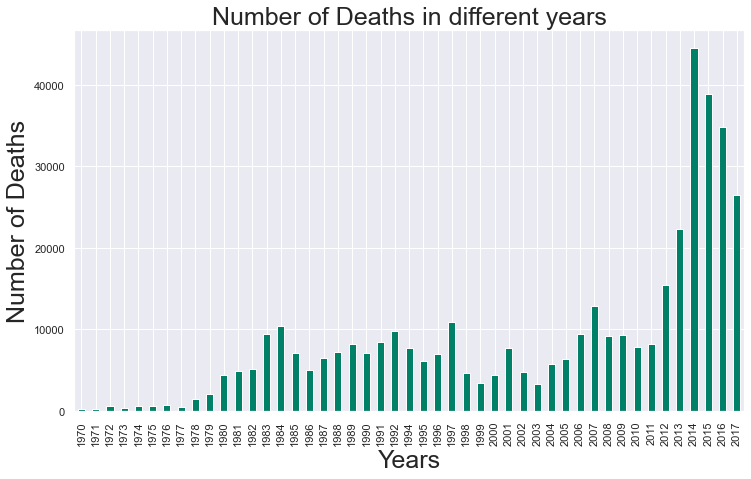

In [27]:
plt.figure(figsize = (12,7))
terr_df.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='summer')
plt.title('Number of Deaths in different years',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of Deaths',fontsize=25)
plt.xticks(rotation=90)
plt.show()

Number of deaths caused by terrorism is more between 2014 and 2018, with on an average >50K people being killed. High peak went to 2014 with 45K+ deaths.

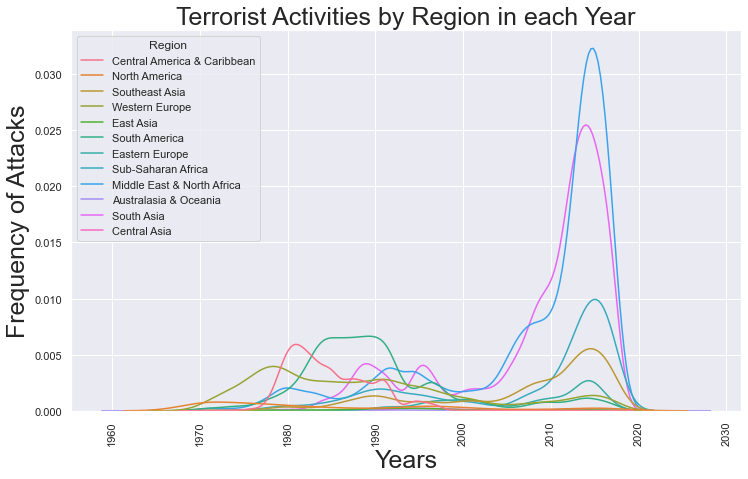

In [28]:
plt.figure(figsize = (12,7))
sns.kdeplot(terr_df['Year'], hue = terr_df['Region'])
plt.title('Terrorist Activities by Region in each Year',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Frequency of Attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis

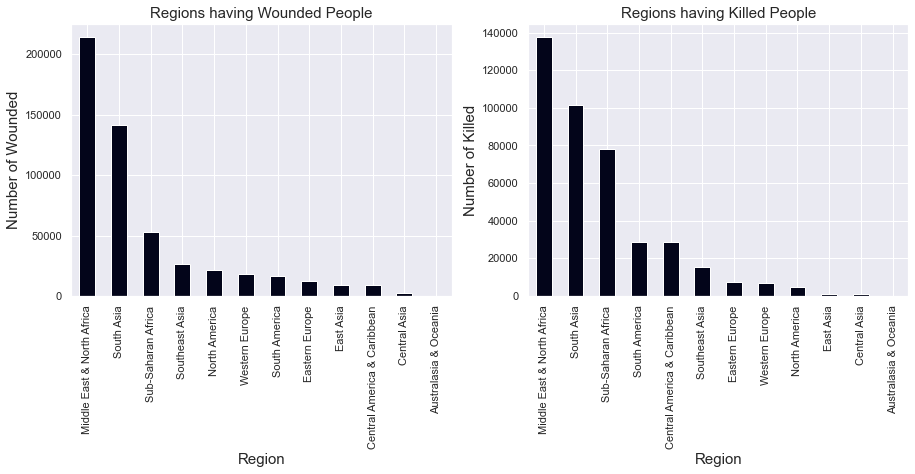

In [29]:
plt.subplot(1,2,1)

terr_df.groupby(['Region'])['Wounded'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Wounded People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
terr_df.groupby(['Region'])['Killed'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Killed People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

'Middle East & North Africa' has the most Killed people (>1.4 Lacs) and wounded people (>2 lacs).

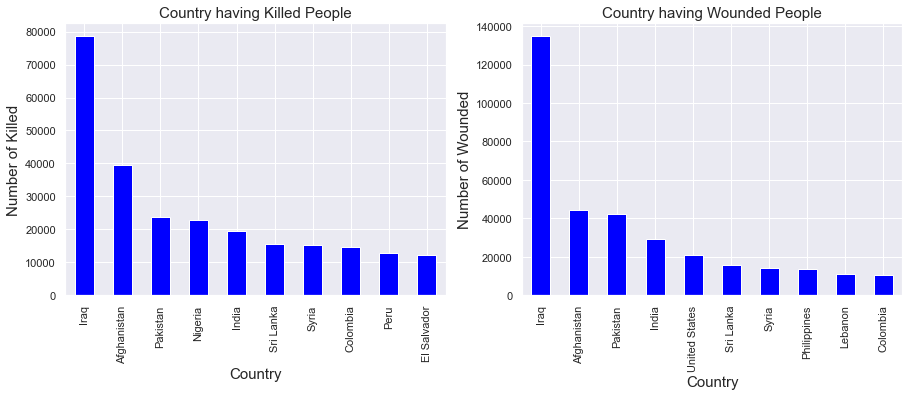

In [30]:
plt.subplot(1,2,2)

df1=terr_df.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='winter')
plt.title('Country having Wounded People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,1)
terr_df.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='winter')
plt.title('Country having Killed People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

'Iraq' has the most Killed people (>70K) and wounded people (>1.2 lacs) Afganistan, pakistan and India all saw peak deaths while Iraq, which has overtaken all of these at the top of the table, suffered 37,700 more fatalities.

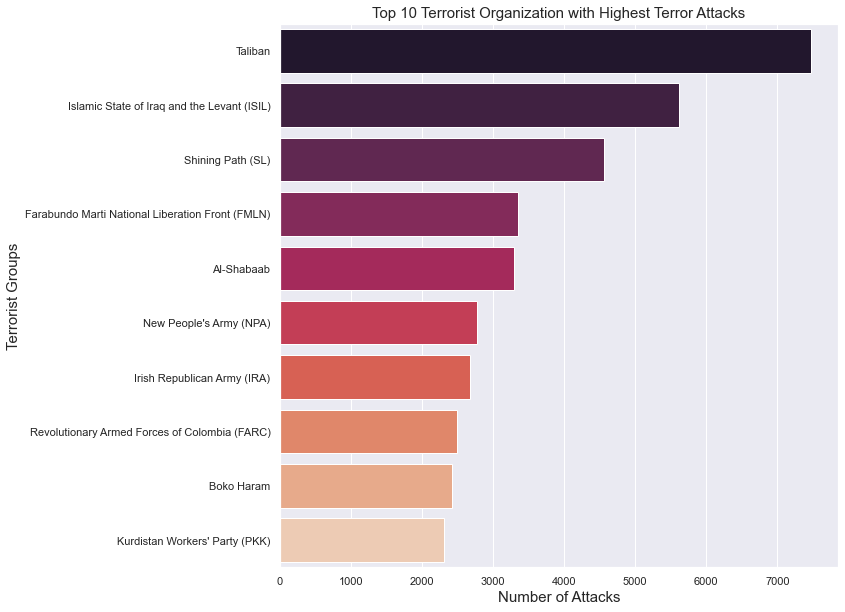

In [31]:
plt.figure(figsize=(10,10))
sns.barplot(terr_df['Group'].value_counts()[1:11].values, terr_df['Group'].value_counts()[1:11].index,palette='rocket')
plt.title('Top 10 Terrorist Organization with Highest Terror Attacks',fontsize=15)
plt.xlabel('Number of Attacks',fontsize=15)
plt.ylabel('Terrorist Groups',fontsize=15)
plt.show()


In [32]:
terr_df_tal = terr_df[terr_df.Group == 'Taliban']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '1995'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017')])

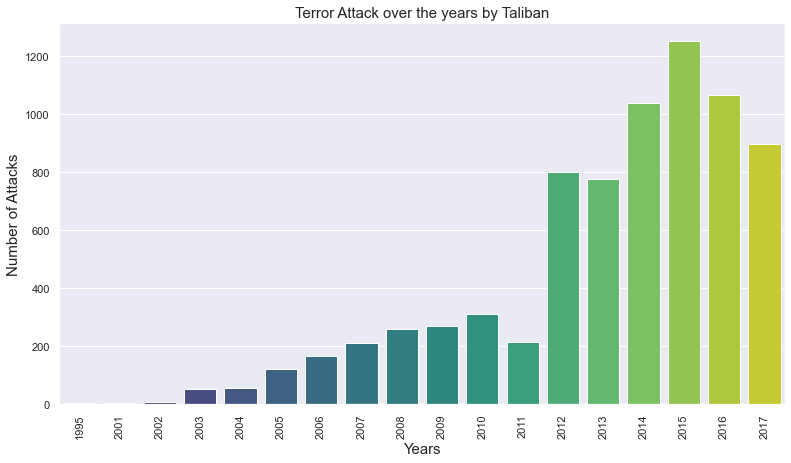

In [33]:
# Terror Attacks by Taliban over the Years

plt.figure(figsize = (13,7))
sns.barplot(terr_df_tal['Year'].value_counts().index,terr_df_tal['Year'].value_counts().values, palette = 'viridis')
plt.title('Terror Attack over the years by Taliban',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation= 90)

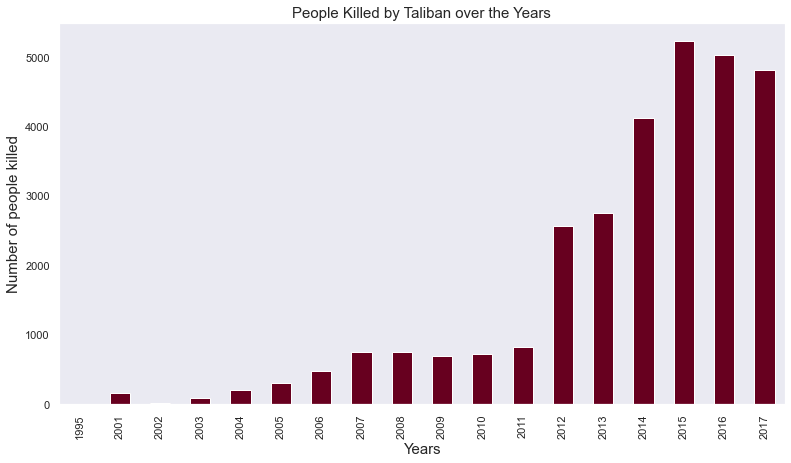

In [34]:
plt.figure(figsize=(13,7))
terr_df_tal.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='RdBu')
plt.title('People Killed by Taliban over the Years',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of people killed',fontsize=15)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Taliban killed more than 5000 people during 2015 after that a decreasing trend could be seen but still the numbers are very high.

In [35]:
# creating new dataframe for the year 2014

terr_df_2014 = terr_df[terr_df.Year == 2014]

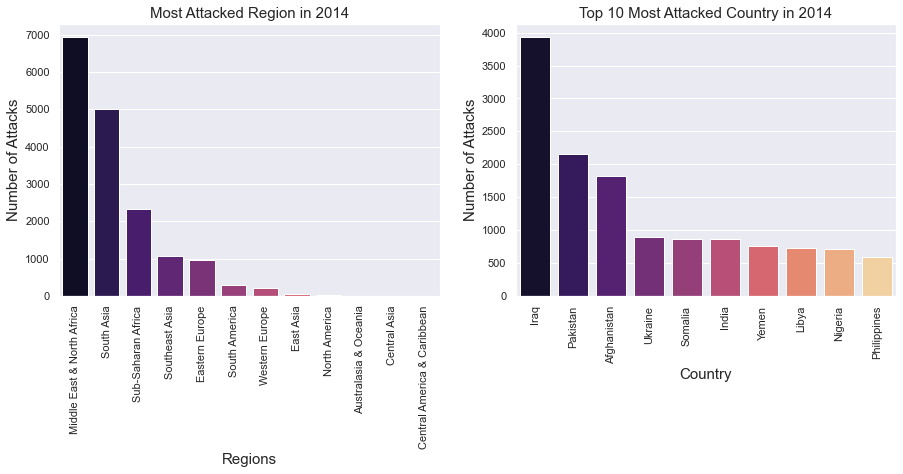

In [36]:
# Regions that were attacked most in 2014

plt.subplot(1,2,1)
sns.barplot(terr_df_2014['Region'].value_counts().index,terr_df_2014['Region'].value_counts().values,palette='magma')
plt.title('Most Attacked Region in 2014',fontsize=15)
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)

# top 10 countries that were attacked most in 2014

plt.subplot(1,2,2)
sns.barplot(terr_df_2014['Country'].value_counts().head(10).index,terr_df_2014['Country'].value_counts().head(10).values,palette='magma')
plt.title('Top 10 Most Attacked Country in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

### With these Graphs, we can conclude that :

◾ In 2014, Most Attacked Region 'Middle East and North Africa' then comes South Asia.

◾ In 2014, Most Attacked Country is 'Iraq'.

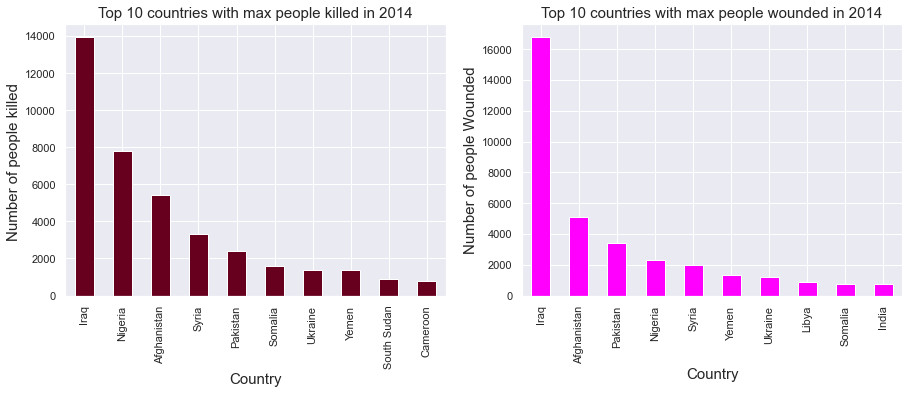

In [37]:
plt.subplot(1,2,1)
terr_df_2014.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='RdBu')
plt.title('Top 10 countries with max people killed in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of people killed ',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
terr_df_2014.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='spring')
plt.title('Top 10 countries with max people wounded in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of people Wounded',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

# Conclusion:

### After performing the Exploratory Data Analysis we get the following insights from the data:

◾ Private Citizens and Property were attacked most followed by Military, Police, Government and so on.

◾ Middle East & North Africa was most affected among the top affected region. Most of the people in this region were either   wounded or killed.

◾ Iraq was the country which was most affected by terror attacks and had maximum number of killed and wounded people.

◾ The State and City that was most affected was Baghdad.

◾ In the last decade 2014 had most number of terror attacks. That was around 16500 attacks during this year which means on average 45 attacks per day.

◾ The most common attack type was Bombing/Explosion.

◾ Explosives have been consistently the most popular weapon of choice for terrorists.

◾ Taliban became more active since 2012 and they are responsible for the most of the terror attacks.

### Recommendation:

◾ Since Private Citizens and Property are being targeted consistently so stronger security and surveillance should be provided, especially in the dense populated regions.

◾ More surveillance is required especially in the Middle East & North African Regions.

◾ Strict border policy should be implemented to prevent the movement of explosives between the regions.